In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel(r'DataFinal17-20.xlsx',sheet_name='2019')
df1=df.iloc[:,2:16]
df1=df1.drop(['Total'], axis=1)
df1.head()

,Homicide/Murder,Causing death by negligence,Hurt,Assault on woman,Kidnapping and abduction,Human trafficking,Rape,Offence against public tranquility,Offences against property,Offences relating to documents and property marks,Miscellaneous,Others,Population
0,217,832,1362,486,420,0,60,759,4233,231,3585,357,4543159
1,96,156,1167,197,126,0,31,116,808,95,2040,385,1813906
2,187,316,1681,400,271,2,76,96,2233,189,4083,196,2888445
3,170,489,1718,344,318,0,67,347,7888,356,3190,349,3701282
4,129,316,955,204,128,4,47,322,940,97,1186,120,2585049


In [3]:
from sklearn.cluster import KMeans

#create a list for the wcss parameter
wcss = []
#test with 14 clusters
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

In [4]:
wcss

[251991187936399.2,
 55692289849190.91,
 19924584653473.33,
 11064906720525.525,
 7470714685756.528,
 4418925900764.099,
 2716193960092.8735,
 1760178331067.8752,
 955489851667.8334,
 716228625034.8999,
 528041128429.5249,
 406281289101.1917,
 300937668442.69165,
 194269022123.81665]

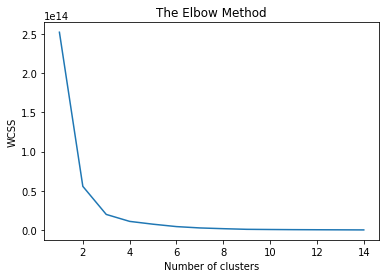

In [5]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
km=KMeans(n_clusters=6)
y_pred=km.fit_predict(df1)

In [7]:
y_pred

array([2, 0, 3, 2, 3, 0, 3, 3, 0, 0, 0, 0, 2, 0, 2, 3, 1, 2, 3, 0, 4, 0,
       0, 0, 5, 3, 0, 3, 3, 0, 2, 1, 0, 0, 3])

In [8]:
df['cluster']=y_pred
df.head()

,SrNo,District,Homicide/Murder,Causing death by negligence,Hurt,Assault on woman,Kidnapping and abduction,Human trafficking,Rape,Offence against public tranquility,...,Others,Total,Population,Crime Rate,Sex Ratio,Literacy,Density,Latitude,Longitude,cluster
0,1,Ahmednagar,217,832,1362,486,420,0,60,759,...,357,12542,4543159,0.276063,939,0.7905,266,19.094829,74.747979,2
1,2,Akola,96,156,1167,197,126,0,31,116,...,385,5217,1813906,0.287611,946,0.8805,320,20.700216,77.008168,0
2,3,Amravati,187,316,1681,400,271,2,76,96,...,196,9730,2888445,0.336859,951,0.8738,237,20.931982,77.752304,3
3,4,Aurangbad,170,489,1718,344,318,0,67,347,...,349,15236,3701282,0.411641,923,0.7902,366,19.876165,75.343314,2
4,5,Beed,129,316,955,204,128,4,47,322,...,120,4448,2585049,0.172066,916,0.7699,242,18.990088,75.753132,3


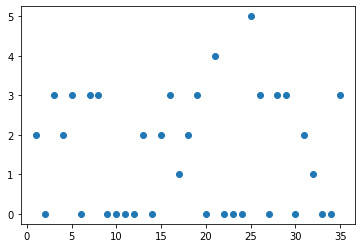

In [9]:
plt.scatter(df['SrNo'],df['cluster'])

In [10]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [11]:
x = linkage(df1, method="complete",metric="euclidean")

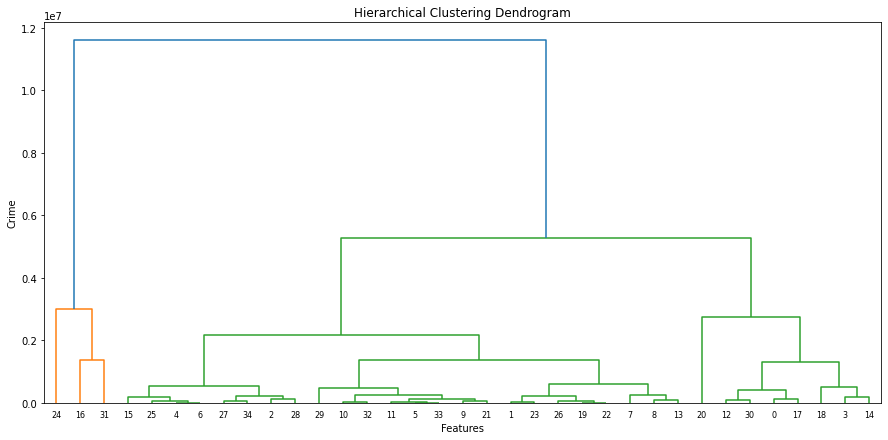

In [12]:
plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(x,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()